# 07 - b - Saturn  - Feasibility Charts - Drag

In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

import numpy as np
from scipy import interpolate

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Polygon
import os

In [2]:
# Set up the planet and atmosphere model.
planet=Planet("SATURN")
planet.h_skip = 1000e3
planet.h_low = 50e3
planet.loadAtmosphereModel('../atmdata/Saturn/saturn-nominal.dat', 0 , 1 , 2, 3, heightInKmFlag=True)

In [3]:
beta1 = 20.0

runID = 'saturn-drag-'

In [7]:
vinf_kms_array  = np.linspace( 0.0,   30.0,   11)
betaRatio_array = np.linspace( 1.0,   41.0 ,  11)

v0_kms_array    = np.zeros(len(vinf_kms_array))
v0_kms_array[:] = np.sqrt(1.0*(vinf_kms_array[:]*1E3)**2.0 + 2*np.ones(len(vinf_kms_array))*\
                          planet.GM/(planet.RP+1000.0*1.0E3))/1.0E3

overShootLimit_array  = np.zeros((len(v0_kms_array),len(betaRatio_array)))
underShootLimit_array = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_os_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
exitflag_us_array     = np.zeros((len(v0_kms_array),len(betaRatio_array)))
TCW_array             = np.zeros((len(v0_kms_array),len(betaRatio_array)))

In [8]:
for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 300.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,-4.5,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.setDragModulationVehicleParams(beta1,betaRatio_array[j])

        underShootLimit_array[i,j], exitflag_us_array[i,j] = vehicle.findUnderShootLimitD(2400.0, 1.0, -15.0,-4.0,1E-10,4000)
        overShootLimit_array[i,j] , exitflag_os_array[i,j] = vehicle.findOverShootLimitD (2400.0, 1.0, -15.0,-4.0,1E-10,4000)

        TCW_array[i,j]    = overShootLimit_array[i,j] - underShootLimit_array[i,j]

        print('VINF: '+str(vinf_kms_array[i])+' km/s, BETA RATIO: '+str(betaRatio_array[j])+' TCW: '+str(TCW_array[i,j])+' deg.')

np.savetxt('../data/jsr-paper/saturn/'+runID+'vinf_kms_array.txt',vinf_kms_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'v0_kms_array.txt',v0_kms_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'betaRatio_array.txt',betaRatio_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'overShootLimit_array.txt',overShootLimit_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'exitflag_os_array.txt',exitflag_os_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'underShootLimit_array.txt',underShootLimit_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'exitflag_us_array.txt',exitflag_us_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'TCW_array.txt',TCW_array)

VINF: 0.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 0.0 km/s, BETA RATIO: 5.0 TCW: 0.8760489264823264 deg.
VINF: 0.0 km/s, BETA RATIO: 9.0 TCW: 1.1740835885866545 deg.
VINF: 0.0 km/s, BETA RATIO: 13.0 TCW: 1.353705618152162 deg.
VINF: 0.0 km/s, BETA RATIO: 17.0 TCW: 1.4829480180342216 deg.
VINF: 0.0 km/s, BETA RATIO: 21.0 TCW: 1.5833320954698138 deg.
VINF: 0.0 km/s, BETA RATIO: 25.0 TCW: 1.6647800668724813 deg.
VINF: 0.0 km/s, BETA RATIO: 29.0 TCW: 1.7335814872858464 deg.
VINF: 0.0 km/s, BETA RATIO: 33.0 TCW: 1.7925984178727958 deg.
VINF: 0.0 km/s, BETA RATIO: 37.0 TCW: 1.8447420470474754 deg.
VINF: 0.0 km/s, BETA RATIO: 41.0 TCW: 1.8914975341031095 deg.
VINF: 3.0 km/s, BETA RATIO: 1.0 TCW: 0.0 deg.
VINF: 3.0 km/s, BETA RATIO: 5.0 TCW: 0.875843480709591 deg.
VINF: 3.0 km/s, BETA RATIO: 9.0 TCW: 1.1734758539678296 deg.
VINF: 3.0 km/s, BETA RATIO: 13.0 TCW: 1.3534271934986464 deg.
VINF: 3.0 km/s, BETA RATIO: 17.0 TCW: 1.4826413269911427 deg.
VINF: 3.0 km/s, BETA RATIO: 21.0 TCW: 1.582680

In [10]:
acc_net_g_max_array       = np.zeros((len(v0_kms_array),len(betaRatio_array)))
stag_pres_atm_max_array   = np.zeros((len(v0_kms_array),len(betaRatio_array)))
q_stag_total_max_array    = np.zeros((len(v0_kms_array),len(betaRatio_array)))
heatload_max_array        = np.zeros((len(v0_kms_array),len(betaRatio_array)))


for i in range(0,len(v0_kms_array)):
    for j in range(0,len(betaRatio_array)):
        vehicle=Vehicle('DMVehicle', 300, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,overShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams(1E-5)

        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variables to plot
        t_min_os         = vehicle.t_minc
        h_km_os          = vehicle.h_kmc
        acc_net_g_os     = vehicle.acc_net_g
        q_stag_con_os    = vehicle.q_stag_con
        q_stag_rad_os    = vehicle.q_stag_rad
        rc_os            = vehicle.rc
        vc_os            = vehicle.vc
        stag_pres_atm_os = vehicle.computeStagPres(rc_os,vc_os)/(1.01325E5)
        heatload_os      = vehicle.heatload


        vehicle=Vehicle('DMVehicle', 300.0, beta1, 0.0, 3.1416, 0.0, 0.10, planet)
        vehicle.setInitialState(1000.0,0.0,0.0,v0_kms_array[i],0.0,underShootLimit_array[i,j],0.0,0.0)
        vehicle.setSolverParams( 1E-5)

        vehicle.propogateEntry (2400.0, 1.0, 0.0)

        # Extract and save variable to plot
        t_min_us         = vehicle.t_minc
        h_km_us          = vehicle.h_kmc
        acc_net_g_us     = vehicle.acc_net_g
        q_stag_con_us    = vehicle.q_stag_con
        q_stag_rad_us    = vehicle.q_stag_rad
        rc_us            = vehicle.rc
        vc_us            = vehicle.vc
        stag_pres_atm_us = vehicle.computeStagPres(rc_us,vc_us)/(1.01325E5)
        heatload_us      = vehicle.heatload

        q_stag_total_os  = q_stag_con_os + q_stag_rad_os
        q_stag_total_us  = q_stag_con_us + q_stag_rad_us

        acc_net_g_max_array[i,j]      = max(max(acc_net_g_os),max(acc_net_g_os))
        stag_pres_atm_max_array[i,j]  = max(max(stag_pres_atm_os),max(stag_pres_atm_os))
        q_stag_total_max_array[i,j]   = max(max(q_stag_total_os),max(q_stag_total_us))
        heatload_max_array[i,j]       = max(max(heatload_os),max(heatload_os))

        print("V_infty: "+str(vinf_kms_array[i])+" km/s"+", BR: "+str(betaRatio_array[j])+" G_MAX: "+str(acc_net_g_max_array[i,j])+" QDOT_MAX: "+str(q_stag_total_max_array[i,j])+" J_MAX: "+str(heatload_max_array[i,j])+" STAG. PRES: "+str(stag_pres_atm_max_array[i,j]))

np.savetxt('../data/jsr-paper/saturn/'+runID+'acc_net_g_max_array.txt',acc_net_g_max_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'stag_pres_atm_max_array.txt',stag_pres_atm_max_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'q_stag_total_max_array.txt',q_stag_total_max_array)
np.savetxt('../data/jsr-paper/saturn/'+runID+'heatload_max_array.txt',heatload_max_array)

V_infty: 0.0 km/s, BR: 1.0 G_MAX: 7.610221219246741 QDOT_MAX: 1128.4054357321504 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 5.0 G_MAX: 7.610221219246741 QDOT_MAX: 1487.2012245003764 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 9.0 G_MAX: 7.610221219246741 QDOT_MAX: 1581.794712573322 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 13.0 G_MAX: 7.610221219246741 QDOT_MAX: 1634.1766579662026 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 17.0 G_MAX: 7.610221219246741 QDOT_MAX: 1670.3295189040787 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 21.0 G_MAX: 7.610221219246741 QDOT_MAX: 1697.589125221713 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 25.0 G_MAX: 7.610221219246741 QDOT_MAX: 1719.0935101478544 J_MAX: 212887.1692913718 STAG. PRES: 0.014746368417578084
V_infty: 0.0 km/s, BR: 29

V_infty: 15.0 km/s, BR: 21.0 G_MAX: 10.37713771325517 QDOT_MAX: 2205.410992699744 J_MAX: 257503.75790269295 STAG. PRES: 0.0201055465642421
V_infty: 15.0 km/s, BR: 25.0 G_MAX: 10.37713771325517 QDOT_MAX: 2232.3046715033456 J_MAX: 257503.75790269295 STAG. PRES: 0.0201055465642421
V_infty: 15.0 km/s, BR: 29.0 G_MAX: 10.37713771325517 QDOT_MAX: 2254.474195522844 J_MAX: 257503.75790269295 STAG. PRES: 0.0201055465642421
V_infty: 15.0 km/s, BR: 33.0 G_MAX: 10.37713771325517 QDOT_MAX: 2273.4094173664857 J_MAX: 257503.75790269295 STAG. PRES: 0.0201055465642421
V_infty: 15.0 km/s, BR: 37.0 G_MAX: 10.37713771325517 QDOT_MAX: 2289.927960380115 J_MAX: 257503.75790269295 STAG. PRES: 0.0201055465642421
V_infty: 15.0 km/s, BR: 41.0 G_MAX: 10.37713771325517 QDOT_MAX: 2304.7198017493565 J_MAX: 257503.75790269295 STAG. PRES: 0.0201055465642421
V_infty: 18.0 km/s, BR: 1.0 G_MAX: 11.617825088322828 QDOT_MAX: 1690.2212180521246 J_MAX: 276500.7312118121 STAG. PRES: 0.02250838676368722
V_infty: 18.0 km/s, BR:

V_infty: 30.0 km/s, BR: 37.0 G_MAX: 18.989912248714383 QDOT_MAX: 4150.257155871858 J_MAX: 382458.53158451436 STAG. PRES: 0.03678407108936335
V_infty: 30.0 km/s, BR: 41.0 G_MAX: 18.989912248714383 QDOT_MAX: 4176.453191050427 J_MAX: 382458.53158451436 STAG. PRES: 0.03678407108936335


C:\Users\AthulGirija\anaconda3\envs\env1\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


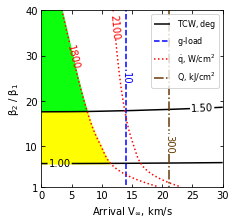

In [13]:
x = np.loadtxt('../data/jsr-paper/saturn/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/saturn/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')
s1 = interpolate.interp2d(x, y, np.transpose(S1), kind='cubic')


x_new =  np.linspace( 0.0,   30,  110)
y_new =  np.linspace( 0.0,   41 ,110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])


Z1 = z1_new
G1 = g1_new
Q1 = q1_new
S1 = s1_new
H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([1.0, 1.5])

Glevels = np.array([10])
Qlevels = np.array([1800, 2100])
Hlevels = np.array([300])
#Slevels = np.array([0.8])


fig = plt.figure()
fig.set_size_inches([3.25,3.25])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

plt.xlim([0.0,30.0])
plt.ylim([1.0,41.0])


ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.2f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)

GCS1.collections[0].set_label(r'$g$'+r'-load')





QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.5)

HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')


#GCS1.collections[0].set_label(r'$Peak$'+r' '+r'$g-load$')
plt.ylim(1,40)
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=10)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=10)
plt.xticks( fontsize=10)
plt.yticks(np.array([ 1, 10, 20, 30, 40,]),fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=8)

for l in Hlabels:
    l.set_rotation(-90)
for l in Glabels:
    l.set_rotation(-90)

dat0 = ZCS1.allsegs[1][0]

x1,y1=dat0[:,0],dat0[:,1]
F1 = interpolate.interp1d(x1, y1, kind='linear',fill_value='extrapolate', bounds_error=False)


dat2 = QCS1.allsegs[0][0]
x3,y3= dat2[:,0],dat2[:,1]
F3 = interpolate.interp1d(x3, y3, kind='linear',fill_value='extrapolate', bounds_error=False)

dat0a = ZCS1.allsegs[0][0]
x1a,y1a=dat0a[:,0],dat0a[:,1]
F1a = interpolate.interp1d(x1a, y1a, kind='linear',fill_value='extrapolate', bounds_error=False)


x4 = np.linspace(0,30,301)
y4 = F1(x4)
y4a =F1a(x4)


y6 = F3(x4)

y7 = y6
y8 = np.minimum(y4,y6)



plt.fill_between(x4, y4, y7, where=y4<=y7,color='xkcd:neon green')

plt.fill_between(x4, y4a, y8, where=y4a<=y8,color='xkcd:bright yellow')







plt.savefig('../data/jsr-paper/saturn/saturn-drag-small.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-drag-small.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-drag-small.eps', dpi=300,bbox_inches='tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


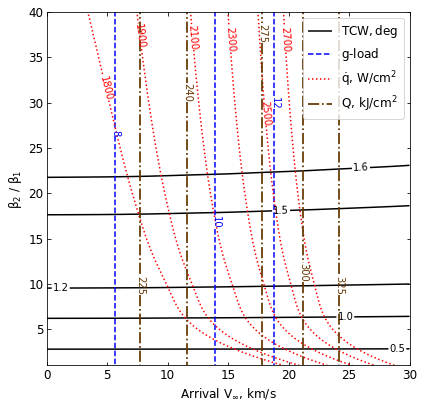

In [19]:
x = np.loadtxt('../data/jsr-paper/saturn/'+runID+'vinf_kms_array.txt')
y = np.loadtxt('../data/jsr-paper/saturn/'+runID+'betaRatio_array.txt')

Z1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'TCW_array.txt')
G1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'acc_net_g_max_array.txt')
Q1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'q_stag_total_max_array.txt')
H1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'heatload_max_array.txt')
S1 = np.loadtxt('../data/jsr-paper/saturn/'+runID+'stag_pres_atm_max_array.txt')


f1 = interpolate.interp2d(x, y, np.transpose(Z1), kind='cubic')
g1 = interpolate.interp2d(x, y, np.transpose(G1), kind='cubic')
q1 = interpolate.interp2d(x, y, np.transpose(Q1), kind='cubic')
h1 = interpolate.interp2d(x, y, np.transpose(H1), kind='cubic')

x_new =  np.linspace( 0.0,   30,  210)
y_new =  np.linspace( 1.0,   41 , 110)

z1_new =  np.zeros((len(x_new),len(y_new)))
g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
#s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        z1_new[i,j] = f1(x_new[i],y_new[j])
        g1_new[i,j] = g1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])

        Z1 = z1_new
        G1 = g1_new
        Q1 = q1_new
        H1 = h1_new/1000.0

X, Y = np.meshgrid(x_new, y_new)

Zlevels = np.array([0.5, 1.0, 1.2, 1.5, 1.6])

Glevels = np.array([8, 10.0, 12.0])
Qlevels = np.array([1800.0, 1900, 2100, 2300, 2500, 2700])
Hlevels = np.array([225.0, 240, 275, 300, 325])
#Slevels = np.array([0.8])

fig = plt.figure()
fig.set_size_inches([6.5,6.5])
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

ZCS1 = plt.contour(X, Y, np.transpose(Z1), levels=Zlevels, colors='black')




plt.clabel(ZCS1, inline=1, fontsize=10, colors='black',fmt='%.1f',inline_spacing=1)
ZCS1.collections[0].set_linewidths(1.5)
ZCS1.collections[1].set_linewidths(1.5)
ZCS1.collections[2].set_linewidths(1.5)
ZCS1.collections[3].set_linewidths(1.5)
ZCS1.collections[4].set_linewidths(1.5)



ZCS1.collections[0].set_label(r'$TCW, deg$')


GCS1 = plt.contour(X, Y, np.transpose(G1), levels=Glevels, colors='blue',linestyles='dashed')

Glabels=plt.clabel(GCS1, inline=1, fontsize=10, colors='blue',fmt='%d',inline_spacing=0)
GCS1.collections[0].set_linewidths(1.5)
GCS1.collections[1].set_linewidths(1.5)
GCS1.collections[2].set_linewidths(1.5)
GCS1.collections[0].set_label(r'$g$'+r'-load')


for l in Glabels:
    l.set_rotation(-90)



QCS1 = plt.contour(X, Y, np.transpose(Q1), levels=Qlevels, colors='red',linestyles='dotted')

plt.clabel(QCS1, inline=1, fontsize=10, colors='red',fmt='%d',inline_spacing=0)
QCS1.collections[0].set_linewidths(1.5)
QCS1.collections[1].set_linewidths(1.5)
QCS1.collections[2].set_linewidths(1.5)
QCS1.collections[3].set_linewidths(1.5)
QCS1.collections[4].set_linewidths(1.5)




QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')


HCS1 = plt.contour(X, Y, np.transpose(H1), levels=Hlevels, colors='xkcd:brown',linestyles='dashdot')

Hlabels=plt.clabel(HCS1, inline=1, fontsize=10, colors='xkcd:brown',fmt='%d',inline_spacing=0)
HCS1.collections[0].set_linewidths(1.75)
HCS1.collections[1].set_linewidths(1.75)
HCS1.collections[2].set_linewidths(1.75)
HCS1.collections[3].set_linewidths(1.75)
HCS1.collections[4].set_linewidths(1.75)


HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

for l in Hlabels:
    l.set_rotation(-90)
    
plt.ylim(1,40)
#plt.grid(True,linestyle='dotted', linewidth=0.3)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
plt.ylabel(r'$\beta_2$'+' / '+r'$ \beta_1 $' ,fontsize=12)
plt.xlabel("Arrival "+r'$V_\infty$'+r', km/s' ,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.legend(loc='upper right', fontsize=12)


plt.savefig('../data/jsr-paper/saturn/saturn-drag-large.png', dpi= 300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-drag-large.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../data/jsr-paper/saturn/saturn-drag-large.eps', dpi=300,bbox_inches='tight')


 
plt.show()